# Surface density analysis

written by Anezka, version 21-07-2025

In [1]:
from origami_analysis import*

In [3]:
import importlib, origami_analysis
importlib.reload(origami_analysis)
brightness_final = origami_analysis.brightness_final

# analysis manual

## INPUT

0) set the degree of labelling of the protein used (insert the value in the dol variable)
   
2) set the single-molecule localization data directory, filename(s) and frame to be analyzed.

**Single-molecule LOCALIZATION data** = data, where it is easy to distinguish & localize each signal. The measured signal is coming from a single molecule (protein, origami with one ligand, etc.). This data is used to calculate surface density from *the number of localized molecules* in .h5 files (the locator output). The surface density is corrected for the degree of labelling (=dol) and roi size.

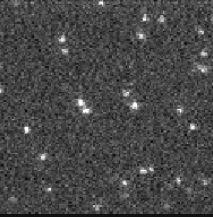

2) Set bulk data directory, filename(s), and frame(s). In addition, set the brightness data directory, filename(s), and frame(s).
   
**Bulk data** = data, where signals overlay, either because of high(er) surface density of monomeric molecules, or measured signal is coming from a cluster of molecules (protein oligomers, origami with 2 ligands, etc.) 

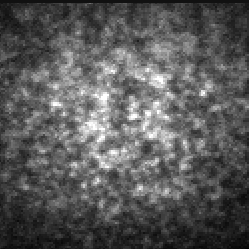

Surface density is calculated as:
$$ \text{surface density} = \frac{\text{bulk intensity - background} }{ \text{single molecule brightness}} $$

**Single-molecule BRIGHTNESS data** = data with single-molecule information (either low-density sample as in (1), or last frames of bulk data). From this data, the single-molecule brightness and the single-molecule background are taken. This data can be used to check the quality of your dataset.

If more than 1 single-molecule brightness filename is used, there are 2 options for calculating bulk surface density:

  - use the mean of all brightness data (brightness data are correlated >> set *brightness_correlation=True*) 
  - use individual brightness data for each bulk data (eg, for bulk number 1, brightness_data number 1; order is important here!). Brightness data are not correlated, set *brightness_correlation=False*


3) choose *homogenously illuminated* rectangular roi in the image-j, insert the top-left and bottom-right coordinates here. Keep the coordinates the same for bulk & brightness data! The roi size is calculated based on the given coordinates. The respective roi (from raw brightness and raw single-molecule data) is cut and saved as a .tiff file

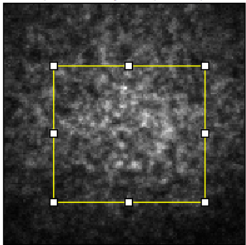

3) use the locator to localize new .tiff single-molecule data (to define single-molecule surface density), and .tiff brightness data (to define single-molecule brightness and single-molecule background). Use daostorm_3d algorithm.

NOTE: The script can be used for analysing single-molecule data only or bulk data only. You do not need both sm/bulk data in order to run the analysis

## OUTPUT

1) **Single-molecule surface density** = mean number of molecules per $\mu m^2$ for the chosen frame, corrected for degree of labelling (= dol) and roi size. The number of molecules is determined from the number of localizations in .h5 files generated by the locator. 

      - *PLOT* = for each measured position within one well (= for each movie in one filename), the mean surface density and error of the mean are calculated. The final plot is saved in the single-molecule data directory defined by the user.
  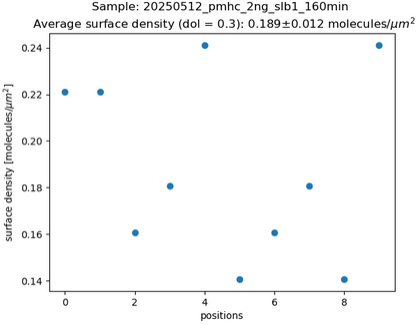


      - overall sm surface density comparison: for all input filenames/wells. The plot is saved in the single-molecule data directory defined by the user.
  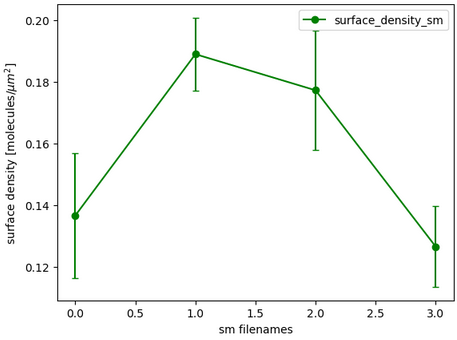
  


2) **Bulk surface density** = mean number of molecules per $\mu m^2$ for the chosen frame, corrected for degree of labelling (= dol) and roi size. The number of molecules is determined from the bulk brightness divided by single-molecule brightness (corrected for single-molecule background). 

      - *PLOT* = for each measured position within one well (= for each movie in one filename), the mean surface density and error of the mean are calculated. The final plot is saved in the bulk data directory defined by the user.
  
      - overall bulk surface density comparison: sm brightness, bulk surface density (with and without correlated sm brightness data: avg/ind), and bulk intensity. The final plot is saved in the bulk data directory defined by the user.
  
   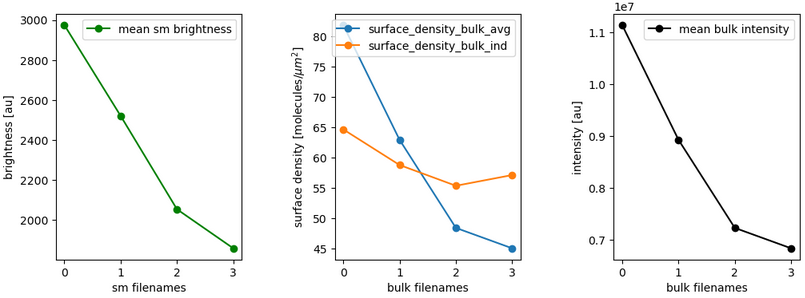


3) Quality check: with **single-molecule brightness data**, the overall quality will be evaluated. The brightness distribution, size distribution, and the mean brightness in time (=frames) is plotted for each brightness filename

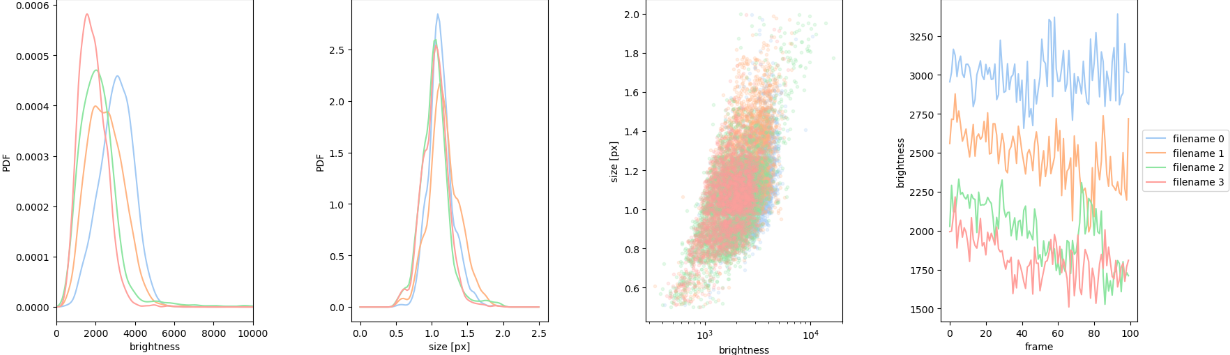

# User input

0) what is the degree of labelling of your fluorophore?

In [2]:
#degree of labeling
dol=1 #0.3
 

1) set the data directories, filename(s) and frame(s) to be analyzed

 - single-molecule (sm) localization data: for the sm surface density

In [21]:
#data path/folder for sm localization data
data_sm= r"/Users/Schorschi/Desktop/Masterarbeit/LAB-Data/Georg/origami_37vs26degrees_1002_1010/20251002_26degrees/origami/400ng/slb2"

#sm localization data filename(s)/well(s): more than filename/well can be inserted!
data_files_sm_filename=['20251002_26degrees_origami_400ng_slb2_110min', '20251002_26degrees_origami_400ng_slb2_190min', '20251002_26degrees_origami_400ng_slb2_250min']

#which frame I want to use for single-molecule localization data (counting starts from 0)
sm_start_frame=90
 

 - bulk data: for the bulk surface density

In [22]:
#data path/folder for bulk data
data_bulk= r"/Users/Schorschi/Desktop/Masterarbeit/LAB-Data/Georg/origami_37vs26degrees_1002_1010/20251002_26degrees/origami/400ng/slb2"

#bulk localization data filename(s)/well(s): more than filename/well can be inserted!
data_bulk_filename=['20251002_26degrees_origami_400ng_slb2_110min', '20251002_26degrees_origami_400ng_slb2_190min', '20251002_26degrees_origami_400ng_slb2_250min']

#which frame is the bulk data (counting starts from 0)
bulk_start_frame=0

- sm brightness data: for the bulk surface density and for the quality check

In [23]:
#data path/folder for sm brightness data
data_brightness= r"/Users/Schorschi/Desktop/Masterarbeit/LAB-Data/Georg/origami_37vs26degrees_1002_1010/20251002_26degrees/origami/400ng/slb2"

#sm brightness data filename(s): for sm brightness analysis, for bulk surface density 
data_files_brightness_filename=['20251002_26degrees_origami_400ng_slb2_110min', '20251002_26degrees_origami_400ng_slb2_190min', '20251002_26degrees_origami_400ng_slb2_250min']

#which frames I want to use for single-molecula brightness data (counting starts from 0)
brightness_start_frame=90
brightness_final_frame=99

#sm brightness data correlated (brightness_correlation=True) ->> mean of all sm-brightness data will be used to calculate bulk density
#sm brightness data not correlated (brightness_correlation=False) ->> for a certain bulk dataset, corresponding sm-brightness data will be used (eg. for bulk nr. 1, brightness_data nr.1 will be used. 
#NOTE: the order of bulk and brightness filenames is important!!!
brightness_correlation=True
 

2) choose *homogenously illuminated* rectangular roi in the image-j, insert the top-left and bottom-right coordinates here. ROI size will be calculated, and used to cut and save single-molecule (localization & brightness) .tiff file

In [24]:
#coordinates of top left corner of the chosen roi
top_left=[20,20] #290,40; 30,30

#coordinates of bottom right corner of the chosen roi
bottom_right=[100,100] #380,110; 120,120

size, size_um, roi_imagej=create_roi(top_left, bottom_right, data_sm, data_files_sm_filename, data_brightness, data_files_brightness_filename)

#print(f'ROI size in pixels:  {size}, ROI size in um:  {size_um}')
 

ROI size in pixels:  [80, 80], ROI size in um:  [12.8, 12.8]


3) use locator to localize created .tiff single-molecule data 

In [2]:
#localization 
sys.executable
subprocess.run([sys.executable, "-m", "sdt.gui.locator"])

/opt/anaconda3/envs/sdt-env/lib/python3.10/runpy.py:126: RuntimeWarning: 'sdt.gui.locator' found in sys.modules after import of package 'sdt.gui', but prior to execution of 'sdt.gui.locator'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2025-11-18 12:29:16.852 python[5141:217702] The class 'NSOpenPanel' overrides the method identifier.  This method is implemented by class 'NSWindow'
/opt/anaconda3/envs/sdt-env/lib/python3.10/runpy.py:126: RuntimeWarning: 'sdt.gui.locator' found in sys.modules after import of package 'sdt.gui', but prior to execution of 'sdt.gui.locator'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
/opt/anaconda3/envs/sdt-env/lib/python3.10/runpy.py:126: RuntimeWarning: 'sdt.gui.locator' found in sys.modules after import of package 'sdt.gui', but prior to execution of 'sdt.gui.locator'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
qt.qpa.backingstore: Back buffer dpr of 1 doesn't match <NSVie

CompletedProcess(args=['/opt/anaconda3/envs/sdt-env/bin/python', '-m', 'sdt.gui.locator'], returncode=0)

# Results

1. single-molecule density

surface density of single-molecule data (dol= 1) 20251002_26degrees_origami_20ng_slb1_120min: 0.08179 molecules/um^2
surface density of single-molecule data (dol= 1) 20251002_26degrees_origami_20ng_slb1_190min: 0.1001 molecules/um^2
surface density of single-molecule data (dol= 1) 20251002_26degrees_origami_20ng_slb1_250min: 0.06531 molecules/um^2


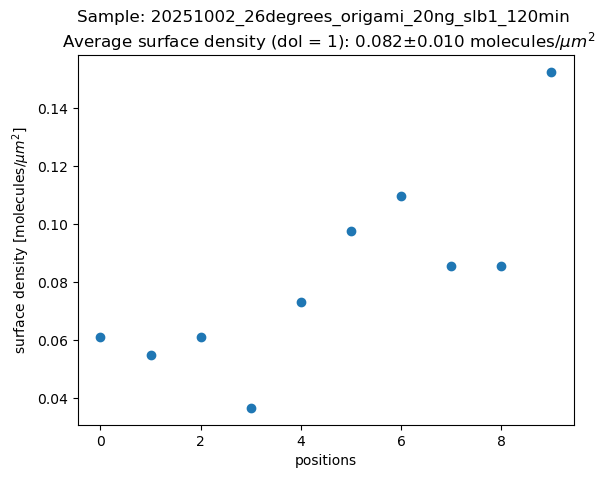

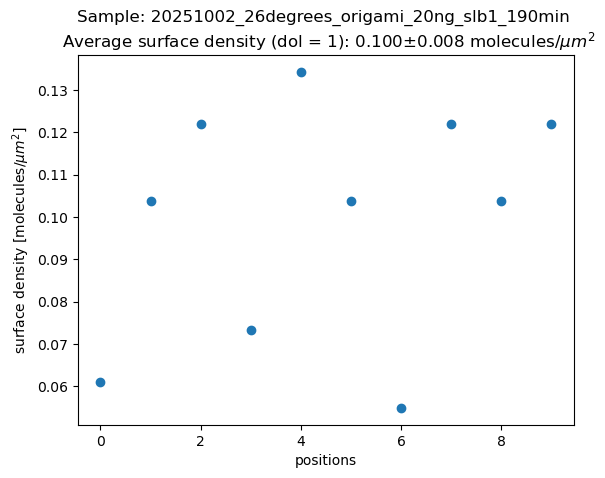

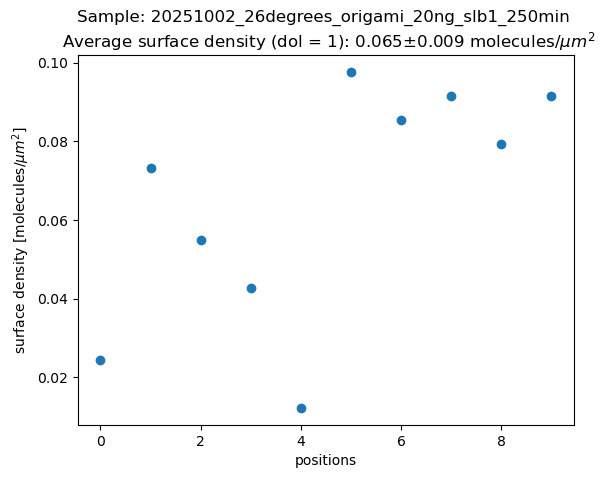

In [13]:
#surface density for individual sm filenames
surface_density_sm, sem_sm=sm_density(data_sm, data_files_sm_filename, sm_start_frame, size_um, dol)

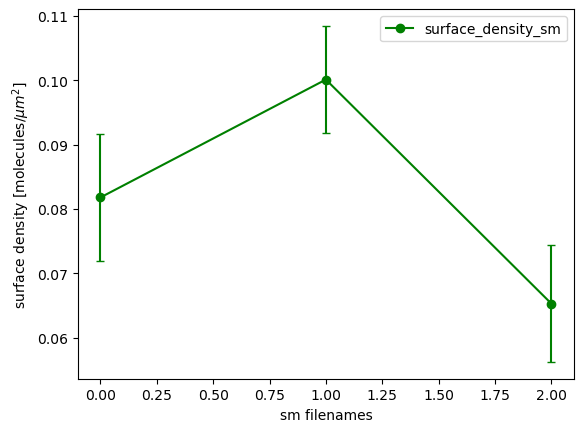

In [14]:
#overall sm surface density 
smdensity_brightness(data_sm, surface_density_sm, sem_sm)

2. bulk surface density

In [15]:
#surface density for individual bulk filenames
single_molecule_mean, single_molecule_bg, single_molecule_size, data_loc_brightness=brightness(data_brightness, data_files_brightness_filename, brightness_start_frame, brightness_final_frame, size_um, dol)

/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:143: RuntimeWarning: Mean of empty slice
  single_molecule_mean_file.append(np.nanmean(data_signal))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:147: RuntimeWarning: Mean of empty slice
  single_molecule_bg_file.append(np.nanmean(data_bg))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:151: RuntimeWarning: Mean of empty slice
  single_molecule_size_file.append(np.nanmean(data_size))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:143: RuntimeWarning: Mean of empty slice
  single_molecule_mean_file.append(np.nanmean(data_signal))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:147: RuntimeWarning: Mean of empty slice
  single_molecule_bg_file.append(np.nanmean(data_bg))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:151: RuntimeWarning: Mean of empty slice
  single_molecule_size_file.append(np.nanm

surface density of bulk data (dol= 1) 20251002_26degrees_origami_400ng_slb1_110min: 67.37 molecules/um^2, sm_data correlated, overall mean of sm_data used
surface density of bulk data (dol= 1) 20251002_26degrees_origami_400ng_slb1_190min: 58.62 molecules/um^2, sm_data correlated, overall mean of sm_data used
surface density of bulk data (dol= 1) 20251002_26degrees_origami_400ng_slb1_240min: 53.01 molecules/um^2, sm_data correlated, overall mean of sm_data used


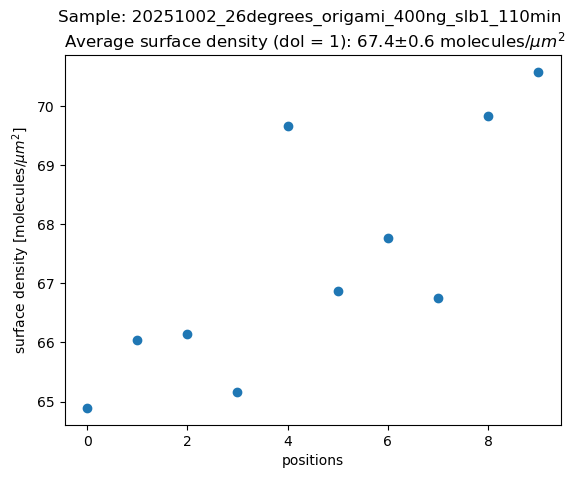

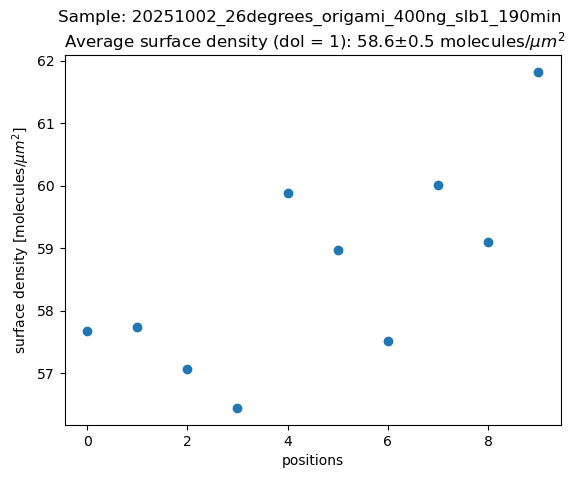

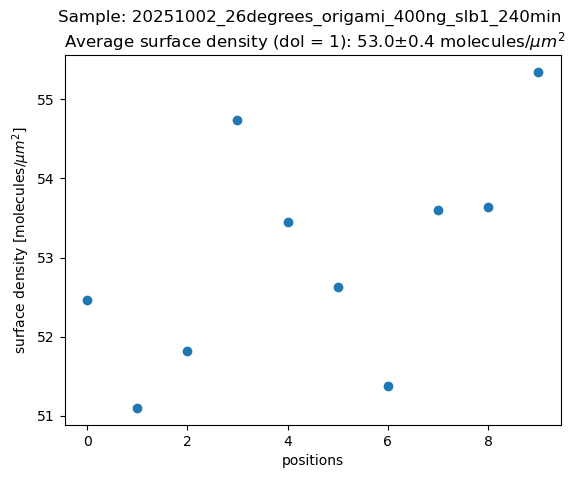

In [16]:
surface_density_bulk_avg, surface_density_bulk_ind, mean_bulk=bulk_density(single_molecule_mean, single_molecule_bg, data_bulk, data_bulk_filename, bulk_start_frame, roi_imagej, size_um, dol, brightness_correlation)

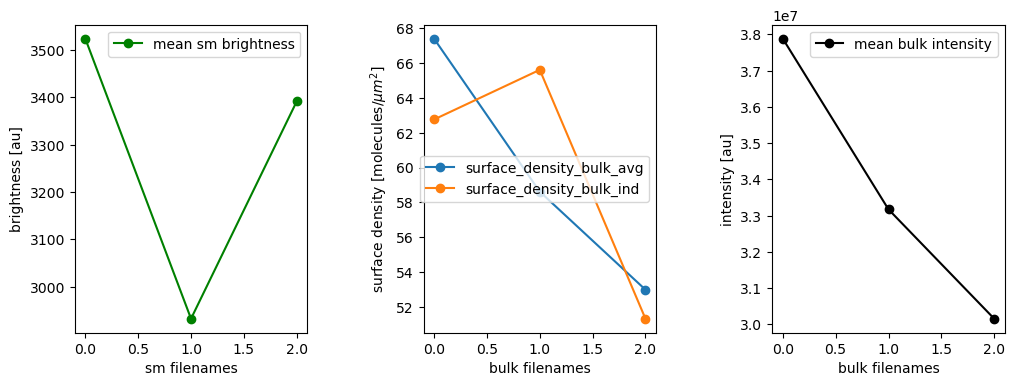

In [17]:
#surface density for all bulk filenames
bulkdensity_brightness(data_bulk, surface_density_bulk_avg,surface_density_bulk_ind, mean_bulk, surface_density_sm, single_molecule_mean)

3. quality check: sm brightness data

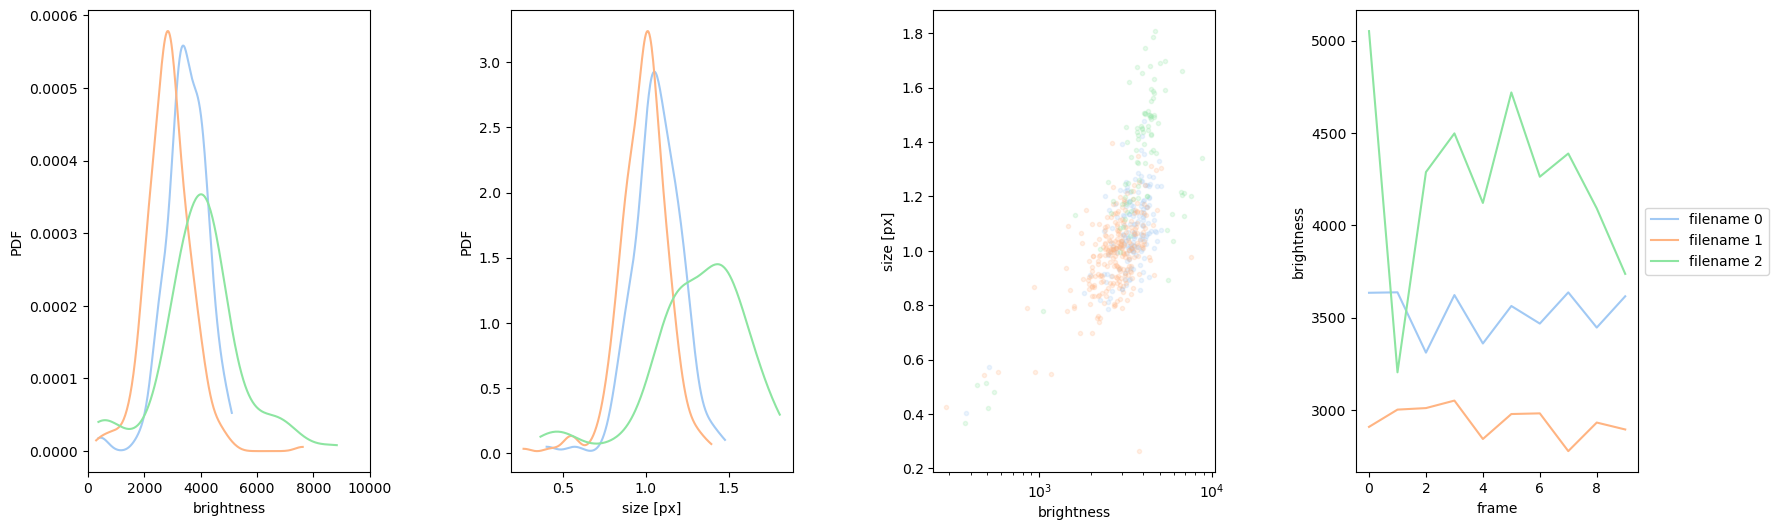

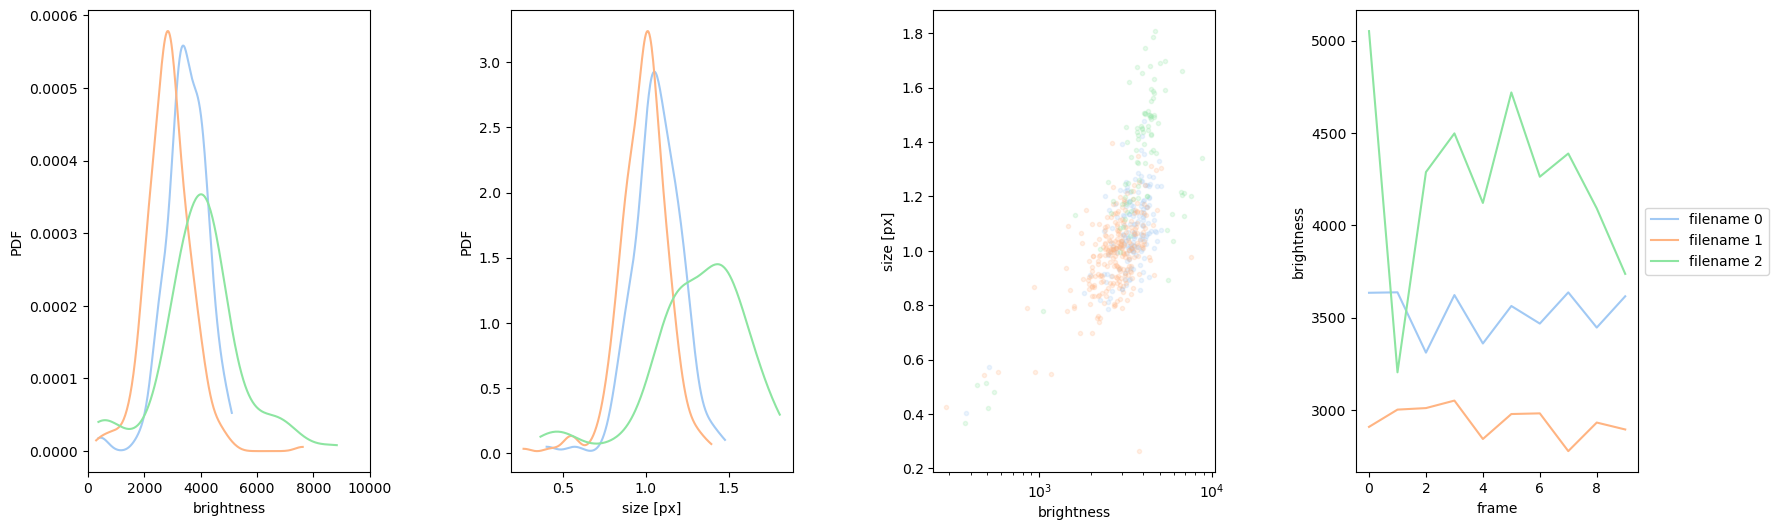

In [18]:
brightness_final(data_brightness, data_loc_brightness, single_molecule_size, single_molecule_mean, brightness_start_frame, brightness_final_frame)

In [41]:
import pandas as pd
import re
import os, numpy as np
import matplotlib.pyplot as plt

data_sm_dirs = [
r"/Users/Schorschi/Desktop/Masterarbeit/LAB-Data/Georg/origami_37vs26degrees_1002_1010/20251003_37degrees/pmhc/10ng/slb1",
r"/Users/Schorschi/Desktop/Masterarbeit/LAB-Data/Georg/origami_37vs26degrees_1002_1010/20251003_37degrees/pmhc/10ng/slb2",
r"/Users/Schorschi/Desktop/Masterarbeit/LAB-Data/Georg/origami_37vs26degrees_1002_1010/20251010_37degrees/pmhc/10ng/slb1",
r"/Users/Schorschi/Desktop/Masterarbeit/LAB-Data/Georg/origami_37vs26degrees_1002_1010/20251010_37degrees/pmhc/10ng/slb2"
]

save_dir = os.path.commonpath(data_sm_dirs)

data_files_sm_filename=[['20251003_37degrees_pmhc_10ng_slb1_50min', '20251003_37degrees_pmhc_10ng_slb1_180min', '20251003_37degrees_pmhc_10ng_slb1_180min'],['20251003_37degrees_pmhc_10ng_slb2_60min', '20251003_37degrees_pmhc_10ng_slb2_140min', '20251003_37degrees_pmhc_10ng_slb2_180min'], ['20251010_37degrees_pmhc_10ng_slb1_100min', '20251010_37degrees_pmhc_10ng_slb1_150min', '20251010_37degrees_pmhc_10ng_slb1_190min', '20251010_37degrees_pmhc_10ng_slb1_260min'],['20251010_37degrees_pmhc_10ng_slb2_110min', '20251010_37degrees_pmhc_10ng_slb2_150min', '20251010_37degrees_pmhc_10ng_slb2_200min', '20251010_37degrees_pmhc_10ng_slb2_260min']]
#coordinates of top left corner of the chosen roi
top_left=[20,20] #290,40; 30,30

#coordinates of bottom right corner of the chosen roi
bottom_right=[100,100] #380,110; 120,120

series_labels = ["10ng pmhc slb1 03.10.", "10ng pmhc slb2 03.10.", "10ng pmhc slb1 10.10.", "10ng pmhc slb2 10.10."]

def extract_minutes(list_of_names):
    pattern = r'_(\d+)min'
    out = []
    for name in list_of_names:
        m = re.search(pattern, name)
        if m:
            out.append(int(m.group(1)))
        else:
            out.append(None)
    return out

df_sm = pd.DataFrame({
    'series_label': series_labels,
    'dir_sm': data_sm_dirs,
    'files_sm': data_files_sm_filename
})

df_sm['times_sm'] = df_sm['files_sm'].apply(lambda lst: extract_minutes(lst))

sm_start_frame=0
brightness_start_frame=90   # e.g., frames 90 to 99 for brightness
brightness_final_frame=99
dol=1
roi_imagej= []

results_brightness = []

for _, row in df_sm.iterrows():
    dir_sm = row['dir_sm']
    files_sm = row['files_sm']
    dir_bright = row['dir_sm']
    files_bright = row['files_sm']
    times_bright = row['times_sm']

    _, size_um, roi_imagej = create_roi(
        top_left, bottom_right,
        dir_sm, files_sm,
        dir_bright, files_bright
    )

    single_molecule_mean, single_molecule_bg, single_molecule_size, data_loc_brightness = brightness(
        dir_bright,
        files_bright,
        brightness_start_frame,
        brightness_final_frame,
        size_um,
        dol
    )

    results_brightness.append({
        'series_label': row['series_label'],
        'dir_bright': dir_bright,
        'files_bright': files_bright,
        'single_molecule_mean': single_molecule_mean,
        'single_molecule_bg': single_molecule_bg,
        'single_molecule_size': single_molecule_size,
        'data_loc_brightness': data_loc_brightness,
        'roi_imagej': roi_imagej,
        'size_um': size_um,
        'times_bright': times_bright
    })

df_bright = pd.DataFrame(results_brightness)

def _plot_brightness_norm(df, metric_key, time, fname, y_label):
    plt.figure()
    plt.ylim(bottom=0)
    all_t = []
    all_y = []
    for _, r in df.iterrows():
        t = np.asarray(r[time], dtype=float)
        y = np.asarray(r[metric_key], dtype=float)
        if t.size == 0 or y.size == 0:
            continue
        # Zeiten relativ zum ersten Punkt, Werte auf ersten Punkt normieren
        t_rel = t - t[0]
        y_norm = y / y[0]
        # nach Zeit sortieren
        idx = np.argsort(t_rel)
        t_rel, y_norm = t_rel[idx], y_norm[idx]
        all_t.append(t_rel)
        all_y.append(y_norm)
        plt.plot(t_rel, y_norm, marker='o', label=r['series_label'])
    if len(all_t) > 0:
        all_t = np.concatenate(all_t)
        all_y = np.concatenate(all_y)
    plt.ylim(top=1.2*all_y.max())
    t_line = np.linspace(all_t.min(), all_t.max(), 200)
    coeffs, cov = np.polyfit(all_t, all_y, 1, cov=True)
    slope = coeffs[0]
    intercept = coeffs[1]
    y_line = slope * t_line + intercept
    slope_err = np.sqrt(cov[0,0])
    plt.plot(t_line, y_line, label=f'Trend (m={slope:.5f} ± {slope_err:.6f} 1/min)', linewidth=1)
    plt.xlabel('Δt [min]')
    plt.ylabel(f'{y_label} (norm. to first value)')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f'{fname}.png'), dpi=300)
    plt.close()

def _plot_brightness_abs(df, metric_key, time, fname, y_label, unit):
    plt.figure()
    plt.ylim(bottom=0)
    all_t = []
    all_y = []
    for _, r in df.iterrows():
        t = np.asarray(r[time], dtype=float)
        y = np.asarray(r[metric_key], dtype=float)
        if t.size == 0 or y.size == 0:
            continue
        # Zeiten relativ zum ersten Punkt, Werte auf ersten Punkt normieren
        t_rel = t - t[0]
        idx = np.argsort(t_rel)
        t_rel, y = t_rel[idx], y[idx]
        all_t.append(t_rel)
        all_y.append(y)
        plt.plot(t_rel, y, marker='o', label=r['series_label'])
    if len(all_t) > 0:
        all_t = np.concatenate(all_t)
        all_y = np.concatenate(all_y)
    plt.ylim(top=1.2*all_y.max())
    t_line = np.linspace(all_t.min(), all_t.max(), 200)
    coeffs, cov = np.polyfit(all_t, all_y, 1, cov=True)
    slope = coeffs[0]
    intercept = coeffs[1]
    y_line = slope * t_line + intercept
    slope_err = np.sqrt(cov[0,0])
    plt.plot(t_line, y_line, label=f'Trend (m={slope:.5f} ± {slope_err:.6f} {unit}/min)', linewidth=1)
    plt.xlabel('Δt [min]')
    plt.ylabel(f'{y_label}')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f'{fname}.png'), dpi=300)
    plt.close()

_plot_brightness_norm(df_bright, 'single_molecule_mean', 'times_bright', 'Mean Brightness SM vs. Time normalized', 'brightness')

_plot_brightness_abs(df_bright, 'single_molecule_mean', 'times_bright', 'Mean Brightness SM vs. Time absolute', r'brightness [au]', 'au')


ROI size in pixels:  [80, 80], ROI size in um:  [12.8, 12.8]
ROI size in pixels:  [80, 80], ROI size in um:  [12.8, 12.8]


/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:143: RuntimeWarning: Mean of empty slice
  single_molecule_mean_file.append(np.nanmean(data_signal))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:147: RuntimeWarning: Mean of empty slice
  single_molecule_bg_file.append(np.nanmean(data_bg))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:151: RuntimeWarning: Mean of empty slice
  single_molecule_size_file.append(np.nanmean(data_size))


ROI size in pixels:  [80, 80], ROI size in um:  [12.8, 12.8]


/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:143: RuntimeWarning: Mean of empty slice
  single_molecule_mean_file.append(np.nanmean(data_signal))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:147: RuntimeWarning: Mean of empty slice
  single_molecule_bg_file.append(np.nanmean(data_bg))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:151: RuntimeWarning: Mean of empty slice
  single_molecule_size_file.append(np.nanmean(data_size))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:143: RuntimeWarning: Mean of empty slice
  single_molecule_mean_file.append(np.nanmean(data_signal))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:147: RuntimeWarning: Mean of empty slice
  single_molecule_bg_file.append(np.nanmean(data_bg))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:151: RuntimeWarning: Mean of empty slice
  single_molecule_size_file.append(np.nanm

ROI size in pixels:  [80, 80], ROI size in um:  [12.8, 12.8]


/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:143: RuntimeWarning: Mean of empty slice
  single_molecule_mean_file.append(np.nanmean(data_signal))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:147: RuntimeWarning: Mean of empty slice
  single_molecule_bg_file.append(np.nanmean(data_bg))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:151: RuntimeWarning: Mean of empty slice
  single_molecule_size_file.append(np.nanmean(data_size))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:143: RuntimeWarning: Mean of empty slice
  single_molecule_mean_file.append(np.nanmean(data_signal))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:147: RuntimeWarning: Mean of empty slice
  single_molecule_bg_file.append(np.nanmean(data_bg))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:151: RuntimeWarning: Mean of empty slice
  single_molecule_size_file.append(np.nanm

ROI size in pixels:  [80, 80], ROI size in um:  [12.8, 12.8]
surface density of single-molecule data (dol= 1) 20251003_37degrees_pmhc_10ng_slb1_50min: 0.76904 molecules/um^2
surface density of single-molecule data (dol= 1) 20251003_37degrees_pmhc_10ng_slb1_180min: 0.74646 molecules/um^2
surface density of single-molecule data (dol= 1) 20251003_37degrees_pmhc_10ng_slb1_180min: 0.74646 molecules/um^2
ROI size in pixels:  [80, 80], ROI size in um:  [12.8, 12.8]


/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:143: RuntimeWarning: Mean of empty slice
  single_molecule_mean_file.append(np.nanmean(data_signal))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:147: RuntimeWarning: Mean of empty slice
  single_molecule_bg_file.append(np.nanmean(data_bg))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:151: RuntimeWarning: Mean of empty slice
  single_molecule_size_file.append(np.nanmean(data_size))


surface density of single-molecule data (dol= 1) 20251003_37degrees_pmhc_10ng_slb2_60min: 0.755 molecules/um^2
surface density of single-molecule data (dol= 1) 20251003_37degrees_pmhc_10ng_slb2_140min: 0.625 molecules/um^2
surface density of single-molecule data (dol= 1) 20251003_37degrees_pmhc_10ng_slb2_180min: 0.41626 molecules/um^2
ROI size in pixels:  [80, 80], ROI size in um:  [12.8, 12.8]


/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:143: RuntimeWarning: Mean of empty slice
  single_molecule_mean_file.append(np.nanmean(data_signal))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:147: RuntimeWarning: Mean of empty slice
  single_molecule_bg_file.append(np.nanmean(data_bg))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:151: RuntimeWarning: Mean of empty slice
  single_molecule_size_file.append(np.nanmean(data_size))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:143: RuntimeWarning: Mean of empty slice
  single_molecule_mean_file.append(np.nanmean(data_signal))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:147: RuntimeWarning: Mean of empty slice
  single_molecule_bg_file.append(np.nanmean(data_bg))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:151: RuntimeWarning: Mean of empty slice
  single_molecule_size_file.append(np.nanm

surface density of single-molecule data (dol= 1) 20251010_37degrees_pmhc_10ng_slb1_100min: 1.41235 molecules/um^2
surface density of single-molecule data (dol= 1) 20251010_37degrees_pmhc_10ng_slb1_150min: 1.38367 molecules/um^2
surface density of single-molecule data (dol= 1) 20251010_37degrees_pmhc_10ng_slb1_190min: 1.29578 molecules/um^2
surface density of single-molecule data (dol= 1) 20251010_37degrees_pmhc_10ng_slb1_260min: 1.19202 molecules/um^2
ROI size in pixels:  [80, 80], ROI size in um:  [12.8, 12.8]


/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:143: RuntimeWarning: Mean of empty slice
  single_molecule_mean_file.append(np.nanmean(data_signal))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:147: RuntimeWarning: Mean of empty slice
  single_molecule_bg_file.append(np.nanmean(data_bg))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:151: RuntimeWarning: Mean of empty slice
  single_molecule_size_file.append(np.nanmean(data_size))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:143: RuntimeWarning: Mean of empty slice
  single_molecule_mean_file.append(np.nanmean(data_signal))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:147: RuntimeWarning: Mean of empty slice
  single_molecule_bg_file.append(np.nanmean(data_bg))
/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:151: RuntimeWarning: Mean of empty slice
  single_molecule_size_file.append(np.nanm

surface density of single-molecule data (dol= 1) 20251010_37degrees_pmhc_10ng_slb2_110min: 1.14746 molecules/um^2
surface density of single-molecule data (dol= 1) 20251010_37degrees_pmhc_10ng_slb2_150min: 1.08887 molecules/um^2
surface density of single-molecule data (dol= 1) 20251010_37degrees_pmhc_10ng_slb2_200min: 0.89661 molecules/um^2
surface density of single-molecule data (dol= 1) 20251010_37degrees_pmhc_10ng_slb2_260min: 0.86365 molecules/um^2
surface density of bulk data (dol= 1) 20251003_37degrees_pmhc_20ng_slb1_50min: 3.65 molecules/um^2, sm_data uncorrelated, corresponding sm_data used
surface density of bulk data (dol= 1) 20251003_37degrees_pmhc_20ng_slb1_110min: 3.05 molecules/um^2, sm_data uncorrelated, corresponding sm_data used
surface density of bulk data (dol= 1) 20251003_37degrees_pmhc_20ng_slb1_170min: 2.29 molecules/um^2, sm_data uncorrelated, corresponding sm_data used
surface density of bulk data (dol= 1) 20251003_37degrees_pmhc_20ng_slb2_50min: 2.57 molecules/u

/Users/Schorschi/Desktop/Masterarbeit/Python-Files/origami_analysis.py:225: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


surface density of bulk data (dol= 1) 20251010_37degrees_pmhc_20ng_slb1_80min: 22.11 molecules/um^2, sm_data uncorrelated, corresponding sm_data used
surface density of bulk data (dol= 1) 20251010_37degrees_pmhc_20ng_slb1_140min: 33.3 molecules/um^2, sm_data uncorrelated, corresponding sm_data used
surface density of bulk data (dol= 1) 20251010_37degrees_pmhc_20ng_slb1_190min: 26.4 molecules/um^2, sm_data uncorrelated, corresponding sm_data used
surface density of bulk data (dol= 1) 20251010_37degrees_pmhc_20ng_slb1_250min: 15.18 molecules/um^2, sm_data uncorrelated, corresponding sm_data used
surface density of bulk data (dol= 1) 20251010_37degrees_pmhc_20ng_slb2_80min: 18.26 molecules/um^2, sm_data uncorrelated, corresponding sm_data used
surface density of bulk data (dol= 1) 20251010_37degrees_pmhc_20ng_slb2_140min: 17.26 molecules/um^2, sm_data uncorrelated, corresponding sm_data used
surface density of bulk data (dol= 1) 20251010_37degrees_pmhc_20ng_slb2_190min: 17.34 molecules/um

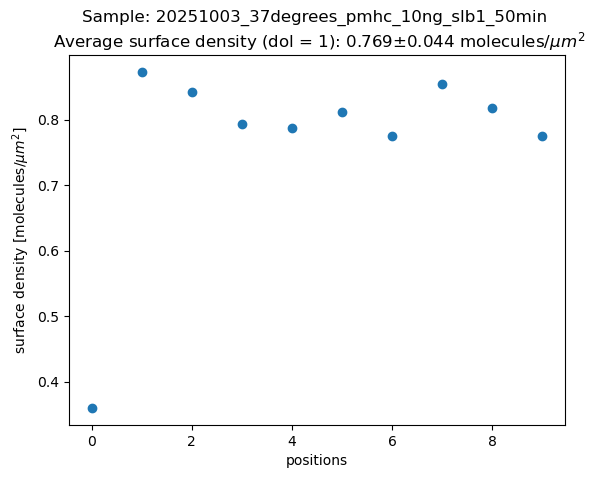

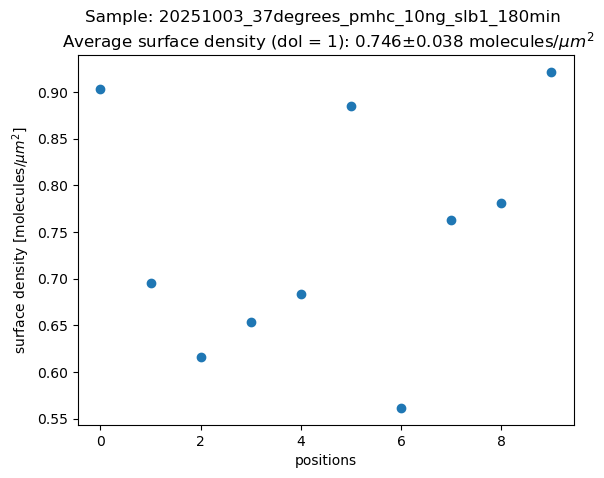

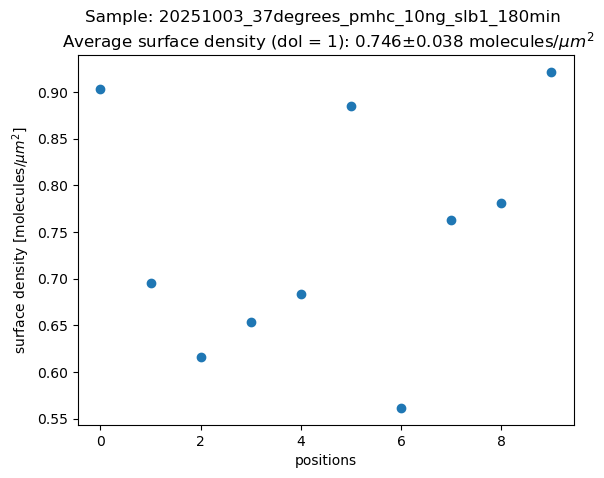

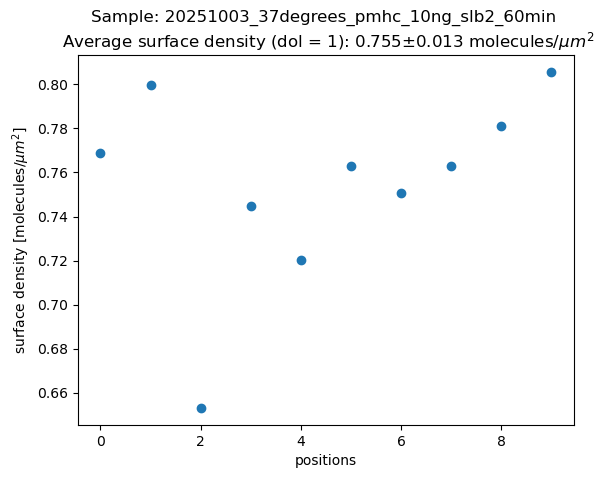

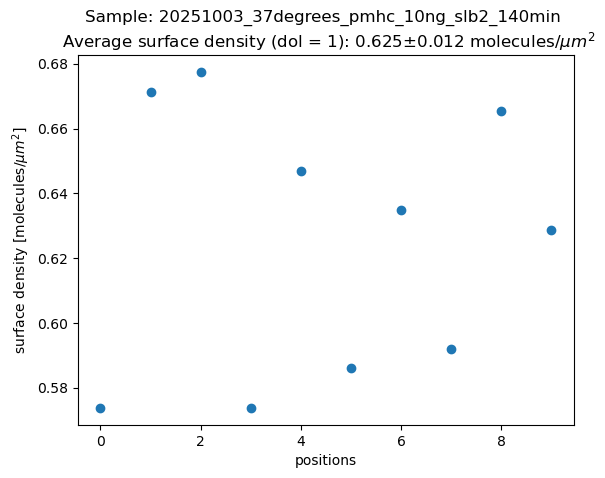

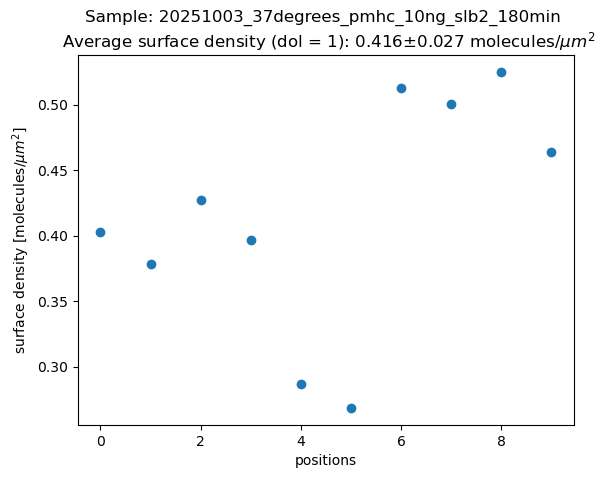

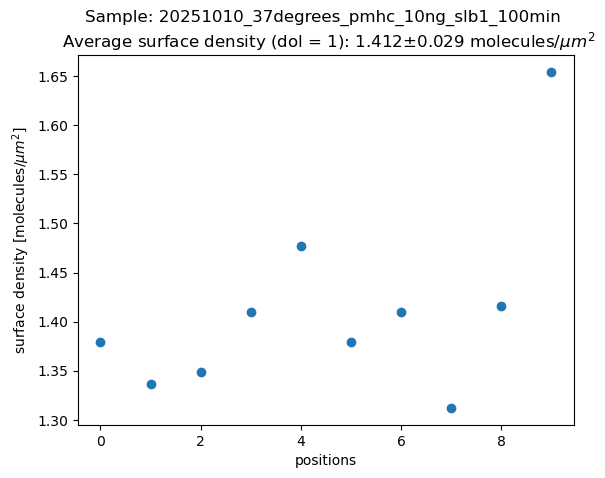

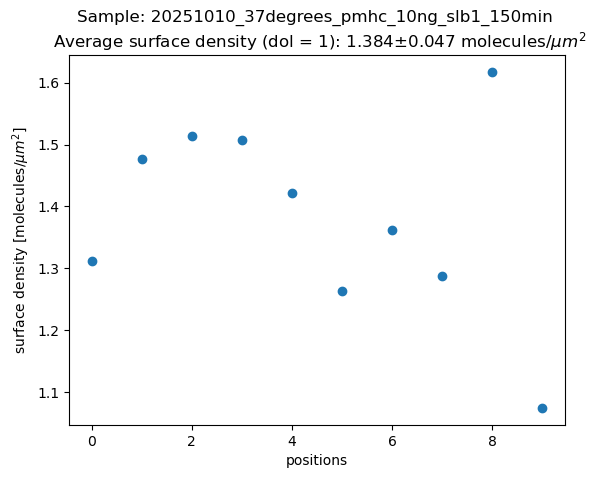

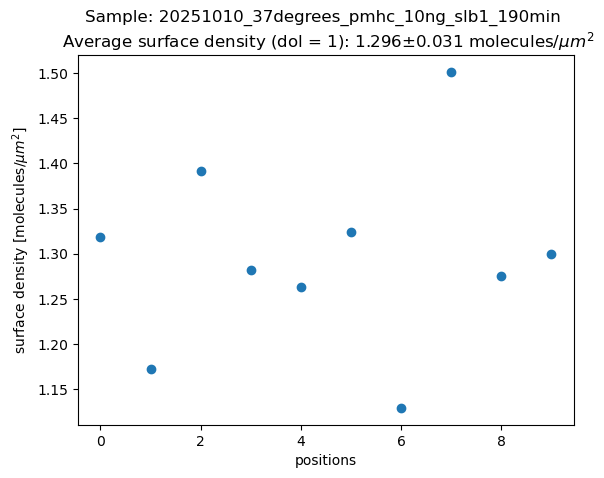

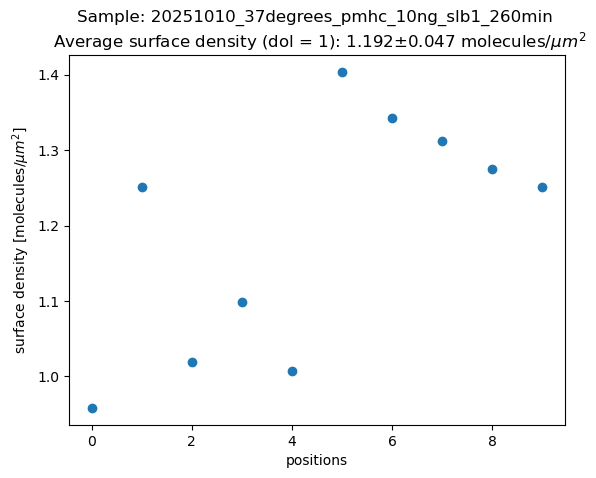

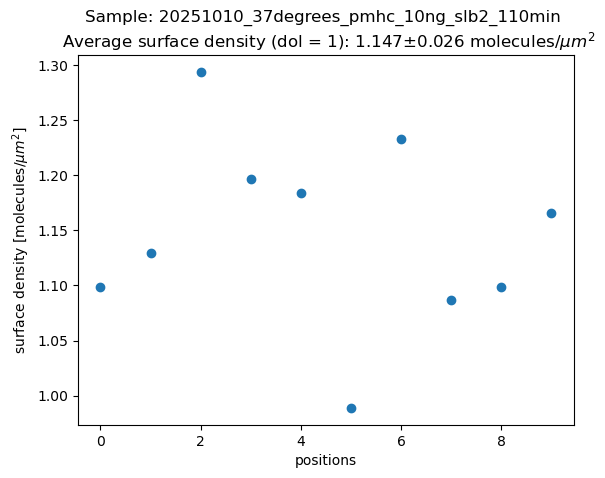

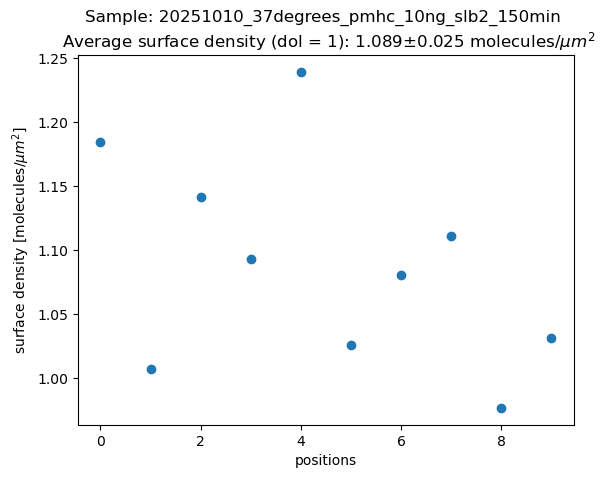

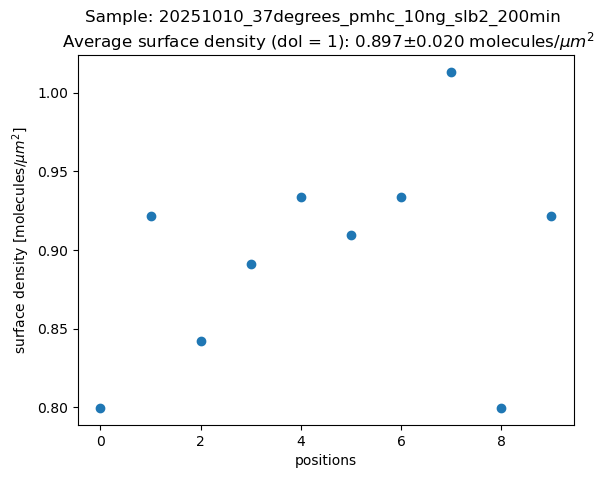

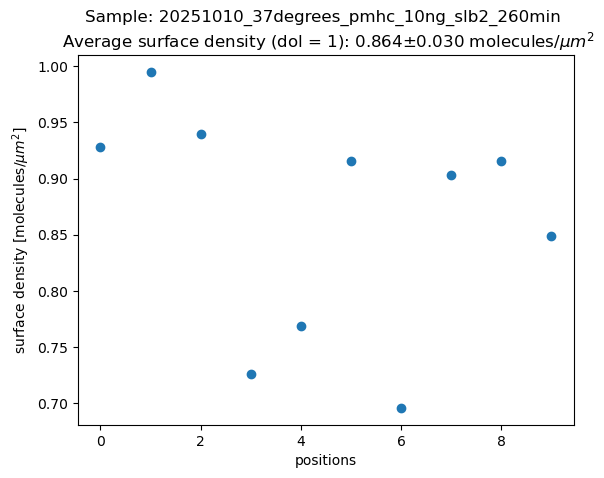

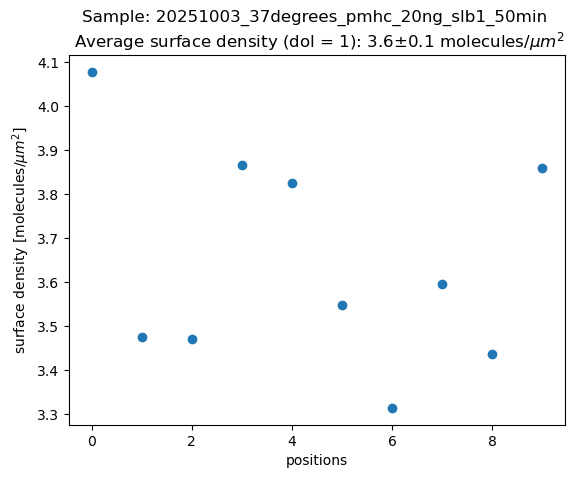

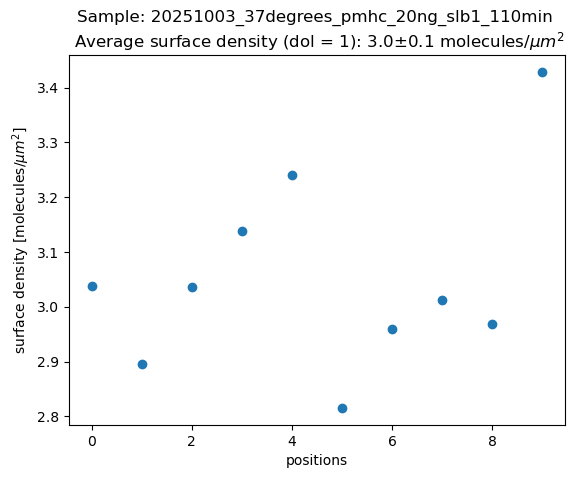

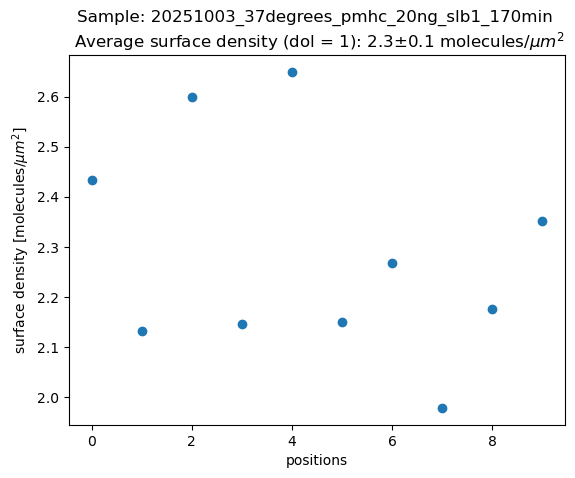

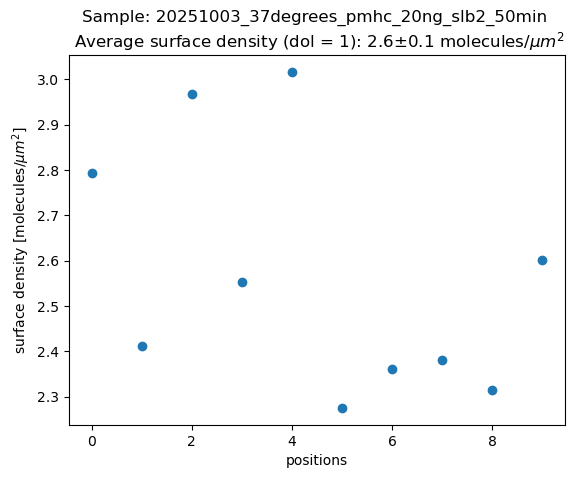

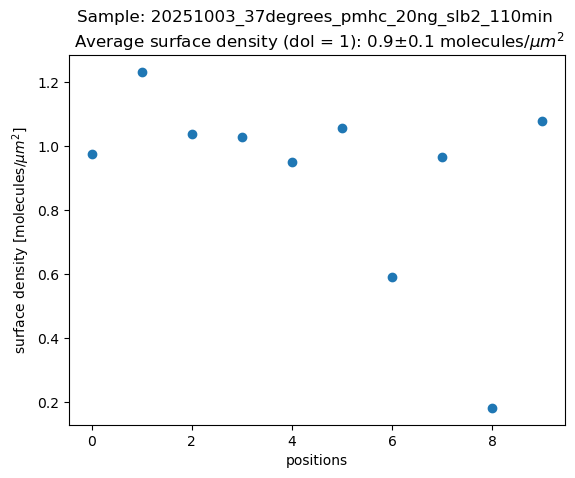

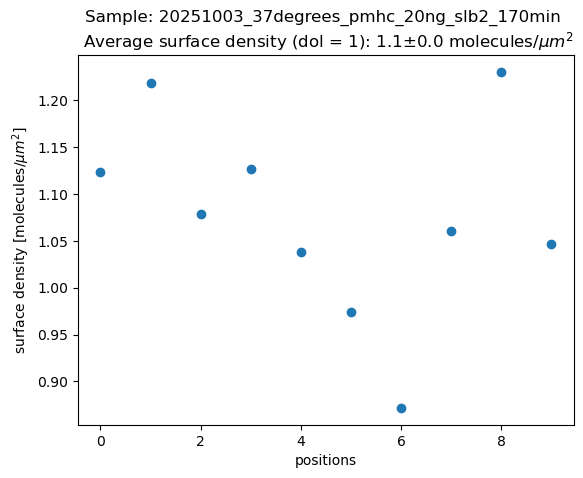

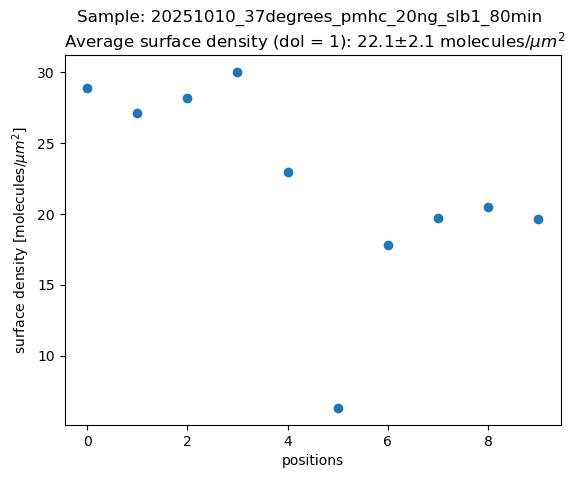

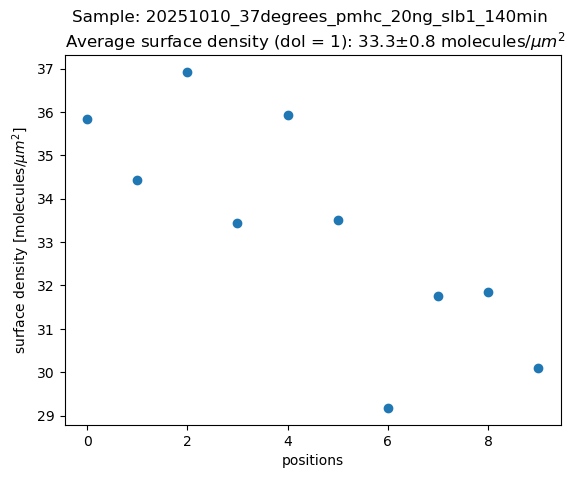

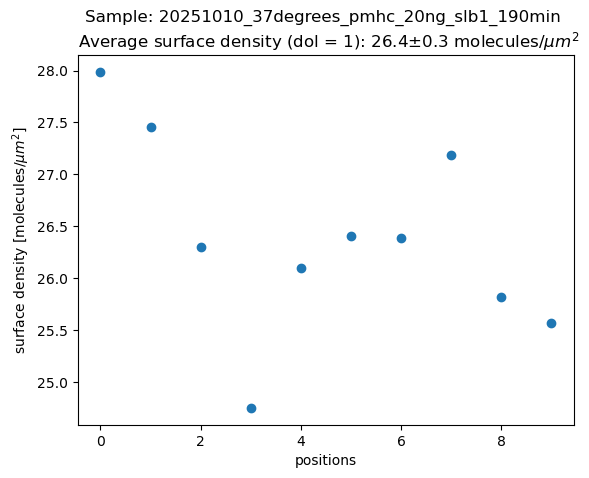

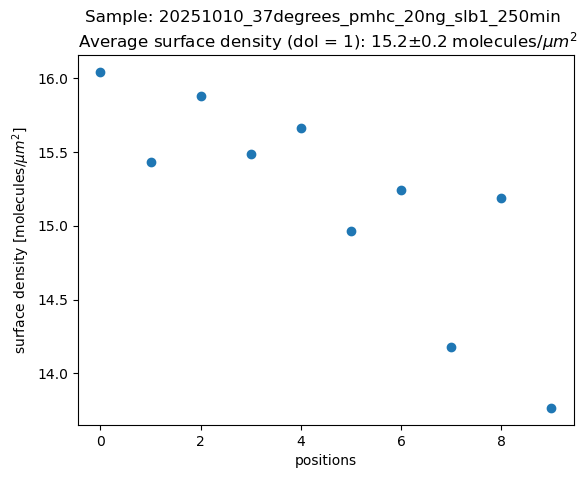

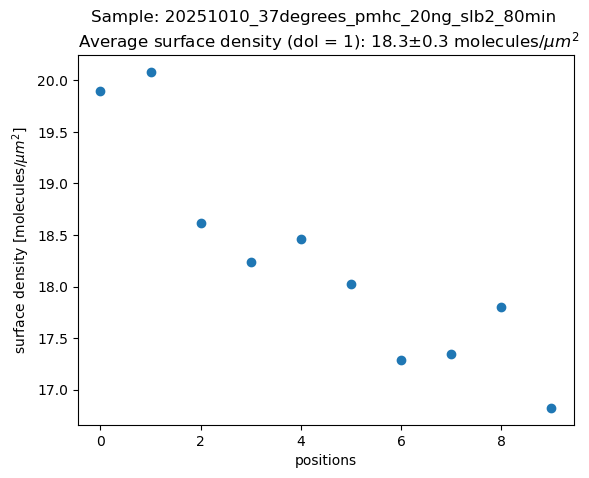

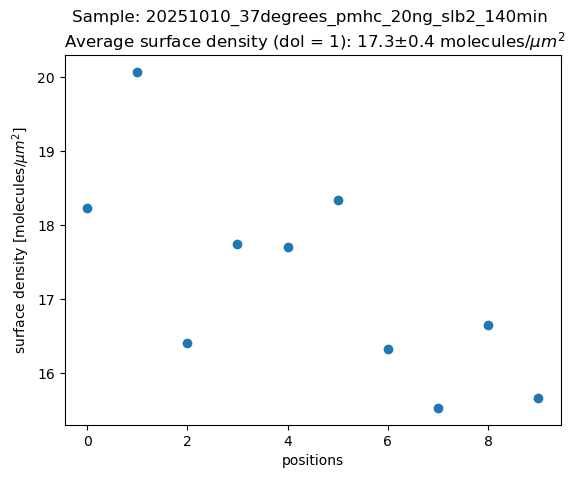

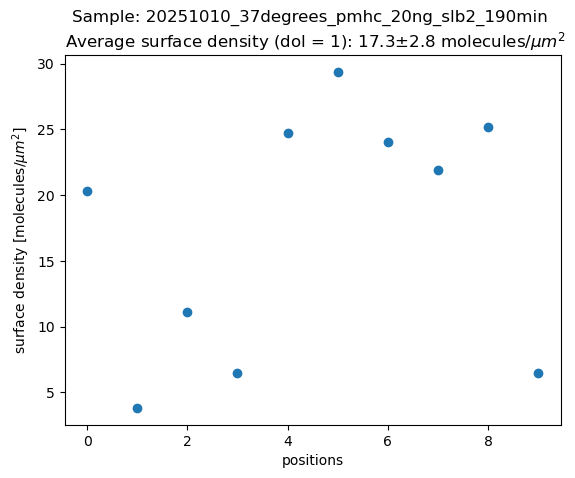

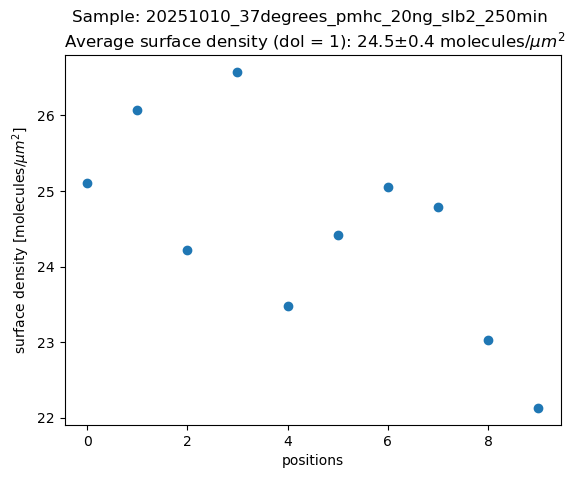

In [38]:
import pandas as pd
import re
import os, numpy as np
import matplotlib.pyplot as plt


data_sm_dirs = [
r"/Users/Schorschi/Desktop/Masterarbeit/LAB-Data/Georg/origami_37vs26degrees_1002_1010/20251003_37degrees/pmhc/10ng/slb1",
r"/Users/Schorschi/Desktop/Masterarbeit/LAB-Data/Georg/origami_37vs26degrees_1002_1010/20251003_37degrees/pmhc/10ng/slb2",
r"/Users/Schorschi/Desktop/Masterarbeit/LAB-Data/Georg/origami_37vs26degrees_1002_1010/20251010_37degrees/pmhc/10ng/slb1",
r"/Users/Schorschi/Desktop/Masterarbeit/LAB-Data/Georg/origami_37vs26degrees_1002_1010/20251010_37degrees/pmhc/10ng/slb2"
]
data_bulk_dirs = [
r"/Users/Schorschi/Desktop/Masterarbeit/LAB-Data/Georg/origami_37vs26degrees_1002_1010/20251003_37degrees/pmhc/20ng/slb1",
r"/Users/Schorschi/Desktop/Masterarbeit/LAB-Data/Georg/origami_37vs26degrees_1002_1010/20251003_37degrees/pmhc/20ng/slb2",
r"/Users/Schorschi/Desktop/Masterarbeit/LAB-Data/Georg/origami_37vs26degrees_1002_1010/20251010_37degrees/pmhc/20ng/slb1",
r"/Users/Schorschi/Desktop/Masterarbeit/LAB-Data/Georg/origami_37vs26degrees_1002_1010/20251010_37degrees/pmhc/20ng/slb2"
]

save_dir = os.path.commonpath(data_bulk_dirs)

data_files_sm_filename=[['20251003_37degrees_pmhc_10ng_slb1_50min', '20251003_37degrees_pmhc_10ng_slb1_180min', '20251003_37degrees_pmhc_10ng_slb1_180min'],['20251003_37degrees_pmhc_10ng_slb2_60min', '20251003_37degrees_pmhc_10ng_slb2_140min', '20251003_37degrees_pmhc_10ng_slb2_180min'], ['20251010_37degrees_pmhc_10ng_slb1_100min', '20251010_37degrees_pmhc_10ng_slb1_150min', '20251010_37degrees_pmhc_10ng_slb1_190min', '20251010_37degrees_pmhc_10ng_slb1_260min'],['20251010_37degrees_pmhc_10ng_slb2_110min', '20251010_37degrees_pmhc_10ng_slb2_150min', '20251010_37degrees_pmhc_10ng_slb2_200min', '20251010_37degrees_pmhc_10ng_slb2_260min']]
data_files_bulk_filename=[['20251003_37degrees_pmhc_20ng_slb1_50min', '20251003_37degrees_pmhc_20ng_slb1_110min', '20251003_37degrees_pmhc_20ng_slb1_170min'], ['20251003_37degrees_pmhc_20ng_slb2_50min', '20251003_37degrees_pmhc_20ng_slb2_110min', '20251003_37degrees_pmhc_20ng_slb2_170min'], ['20251010_37degrees_pmhc_20ng_slb1_80min', '20251010_37degrees_pmhc_20ng_slb1_140min', '20251010_37degrees_pmhc_20ng_slb1_190min', '20251010_37degrees_pmhc_20ng_slb1_250min'], ['20251010_37degrees_pmhc_20ng_slb2_80min', '20251010_37degrees_pmhc_20ng_slb2_140min', '20251010_37degrees_pmhc_20ng_slb2_190min', '20251010_37degrees_pmhc_20ng_slb2_250min']]

#coordinates of top left corner of the chosen roi
top_left=[20,20] #290,40; 30,30

#coordinates of bottom right corner of the chosen roi
bottom_right=[100,100] #380,110; 120,120

series_labels = ["slb1 03.10.", "slb2 03.10.", "slb1 10.10.", "slb2 10.10."]

def extract_minutes(list_of_names):
    pattern = r'_(\d+)min'
    out = []
    for name in list_of_names:
        m = re.search(pattern, name)
        if m:
            out.append(int(m.group(1)))
        else:
            out.append(None)
    return out

df_sm = pd.DataFrame({
    'series_label': series_labels,
    'dir_sm': data_sm_dirs,
    'files_sm': data_files_sm_filename
})

df_sm['times_sm'] = df_sm['files_sm'].apply(lambda lst: extract_minutes(lst))

df_bulk = pd.DataFrame({
    'series_label': series_labels,
    'dir_bulk': data_bulk_dirs,
    'files_bulk': data_files_bulk_filename
})

df_bulk['times_bulk'] = df_bulk['files_bulk'].apply(lambda lst: extract_minutes(lst))


sm_start_frame=0
brightness_start_frame=90   # e.g., frames 90 to 99 for brightness
brightness_final_frame=99
bulk_start_frame=0
dol=1
roi_imagej= []
brightness_correlation=False


results_brightness = []
results_bulk = []

for _, row in df_sm.iterrows():
    dir_sm = row['dir_sm']
    files_sm = row['files_sm']
    dir_bright = row['dir_sm']
    files_bright = row['files_sm']

    _, size_um, roi_imagej = create_roi(
        top_left, bottom_right,
        dir_sm, files_sm,
        dir_bright, files_bright
    )

    single_molecule_mean, single_molecule_bg, single_molecule_size, data_loc_brightness = brightness(
        dir_bright,
        files_bright,
        brightness_start_frame,
        brightness_final_frame,
        size_um,
        dol
    )

    surface_density_sm, sem_sm = sm_density(
        dir_sm,
        files_sm,
        sm_start_frame,
        size_um,
        dol
    )

    results_brightness.append({
        'series_label': row['series_label'],
        'dir_bright': dir_bright,
        'files_bright': files_bright,
        'single_molecule_mean': single_molecule_mean,
        'single_molecule_bg': single_molecule_bg,
        'single_molecule_size': single_molecule_size,
        'data_loc_brightness': data_loc_brightness,
        'roi_imagej': roi_imagej,
        'size_um': size_um
    })

df_bright = pd.DataFrame(results_brightness)

df_merged_bulk_and_bright = df_bulk.merge(
    df_bright,
    on='series_label',
    how='inner'
)

for _, row in df_merged_bulk_and_bright.iterrows():
    dir_bulk = row['dir_bulk'] 
    files_bulk = row['files_bulk'] 
    single_molecule_mean = row['single_molecule_mean'] 
    single_molecule_bg = row['single_molecule_bg']
    roi_imagej = row['roi_imagej']
    size_um = row['size_um']
    times_bulk = row['times_bulk']

    surface_density_bulk_avg, surface_density_bulk_ind, mean_bulk=bulk_density(
        single_molecule_mean,
        single_molecule_bg,
        dir_bulk,
        files_bulk,
        bulk_start_frame,
        roi_imagej,
        size_um,
        dol,
        brightness_correlation
    )

    results_bulk.append({
            'series_label': row['series_label'],
            'dir_bulk': dir_bulk,
            'files_bulk': files_bulk,
            'surface_density_bulk_avg': surface_density_bulk_avg,
            'surface_density_bulk_ind': surface_density_bulk_ind,
            'mean_bulk': mean_bulk,
            'times_bulk': times_bulk
        })


df_results_bulk = pd.DataFrame(results_bulk)

def _plot_metric_norm(df, metric_key, fname, y_label):
    plt.figure()
    plt.ylim(bottom=0)
    all_t = []
    all_y = []
    for _, r in df.iterrows():
        t = np.asarray(r['times_bulk'], dtype=float)
        y = np.asarray(r[metric_key], dtype=float)
        if t.size == 0 or y.size == 0:
            continue
        # Zeiten relativ zum ersten Punkt, Werte auf ersten Punkt normieren
        t_rel = t - t[0]
        y_norm = y / y[0]
        # nach Zeit sortieren
        idx = np.argsort(t_rel)
        t_rel, y_norm = t_rel[idx], y_norm[idx]
        all_t.append(t_rel)
        all_y.append(y_norm)
        plt.plot(t_rel, y_norm, marker='o', label=r['series_label'])
    if len(all_t) > 0:
        all_t = np.concatenate(all_t)
        all_y = np.concatenate(all_y)
    plt.ylim(top=1.2*all_y.max())
    t_line = np.linspace(all_t.min(), all_t.max(), 200)
    coeffs, cov = np.polyfit(all_t, all_y, 1, cov=True)
    slope = coeffs[0]
    intercept = coeffs[1]
    y_line = slope * t_line + intercept
    slope_err = np.sqrt(cov[0,0])
    plt.plot(t_line, y_line, label=f'Trend (m={slope:.5f} ± {slope_err:.6f} 1/min)', linewidth=1)
    plt.xlabel('Δt [min]')
    plt.ylabel(f'{y_label} (norm. to first value)')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f'{fname}.png'), dpi=300)
    plt.close()

def _plot_metric_abs(df, metric_key, fname, y_label, unit):
    plt.figure()
    plt.ylim(bottom=0)
    all_t = []
    all_y = []
    for _, r in df.iterrows():
        t = np.asarray(r['times_bulk'], dtype=float)
        y = np.asarray(r[metric_key], dtype=float)
        if t.size == 0 or y.size == 0:
            continue
        # Zeiten relativ zum ersten Punkt, Werte auf ersten Punkt normieren
        t_rel = t - t[0]
        idx = np.argsort(t_rel)
        t_rel, y = t_rel[idx], y[idx]
        all_t.append(t_rel)
        all_y.append(y)
        plt.plot(t_rel, y, marker='o', label=r['series_label'])
    if len(all_t) > 0:
        all_t = np.concatenate(all_t)
        all_y = np.concatenate(all_y)
    plt.ylim(top=1.2*all_y.max())
    t_line = np.linspace(all_t.min(), all_t.max(), 200)
    coeffs, cov = np.polyfit(all_t, all_y, 1, cov=True)
    slope = coeffs[0]
    intercept = coeffs[1]
    y_line = slope * t_line + intercept
    slope_err = np.sqrt(cov[0,0])
    plt.plot(t_line, y_line, label=f'Trend (m={slope:.5f} ± {slope_err:.6f} {unit}/min)', linewidth=1)
    plt.xlabel('Δt [min]')
    plt.ylabel(f'{y_label}')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f'{fname}.png'), dpi=300)
    plt.close()

# drei Plots erzeugen und speichern
_plot_metric_norm(df_results_bulk, 'surface_density_bulk_avg', 'Surface Density Average vs. Time normalized', 'surface density')
_plot_metric_norm(df_results_bulk, 'surface_density_bulk_ind', 'Surface Density Individual vs. Time normalized', 'surface density')
_plot_metric_norm(df_results_bulk, 'mean_bulk', 'Mean Bulk Brightness vs. Time normalized', 'mean brightness')

_plot_metric_abs(df_results_bulk, 'surface_density_bulk_avg', 'Surface Density Average vs. Time absolute', r'surface density [molecules/$\mu m^2$]', 'molecules/$\mu m^2$')
_plot_metric_abs(df_results_bulk, 'surface_density_bulk_ind', 'Surface Density Individual vs. Time absolute', r'surface density [molecules/$\mu m^2$]', 'molecules/$\mu m^2$')
_plot_metric_abs(df_results_bulk, 'mean_bulk', 'Mean Bulk Brightness vs. Time absolute', 'Mean Brightness [au]', 'au')
